# 1.数据介绍/提出问题

**数据介绍：**本次项目选择的数据集是泰坦尼克号数据，包括泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。下面对数据集中的字段进行解释：PassengerId为乘客序号；Survived为生存情况，0代表死亡，1代表存活；Pclass为船舱等级，1代表一等舱，2代表二等舱，3代表三等舱；Name为人员姓名，Sex为人员性别；SibSp为船上兄弟姐妹丈夫妻子数目；Parch为儿女父母数目；Ticket为船票号码；Fare为船票价格；Cabin为船舱号码；Embarked为出发港口，C = Cherbourg, Q = Queenstown, S = Southampton。  
**提出问题：**哪些因素为影响人员的生存率？










# 2.数据整理

首先读取数据，将文件中的数据以数据框的格式赋值到*titanic_data*中。

In [1]:
import pandas as pd   #导入pandas和numpy包
import numpy as np

In [2]:
titanic_data=pd.read_csv(r'C:\Users\linshoubao\Downloads\P2\titanic-data.csv') #读取数据，赋值到titanic_data中

这里用**head**函数导出*titanic_data*中的前5行数据：

In [3]:
titanic_data.head()   #导出前5行的数据，确认是否赋值成功

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


使用**info**函数查看数据中是否存在缺失值：

In [4]:
titanic_data.info()  #查看是否存在缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


可以看出数据Age,Cabin,Embarked列中存在缺失值，其中Cabin中缺失数据严重，不具备研究的意义。  
暂时我们先不对缺失数据进行处理，避免对其他数据分析造成影响。

# 3.数据分析

主要从性别、年龄、舱位等方面分析与生存率的关系。

## 3.1性别和生存率的关系

In [5]:
titanic_data.groupby('Sex')['Survived'].count()

Sex
female    314
male      577
Name: Survived, dtype: int64

使用**groupby**统计不同组内的人数和生存率。因为生存为1，死亡为0，我们可以通过计算Survived组的平均值来计算生存率：

通过计算发现船上女性314人，男性577人，男性多于女性。下面可以通过图片进行直观感受：

In [6]:
# 导入绘图用的包
%pylab inline      
import matplotlib.pyplot as plt
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


用**plot**函数进行绘图，并对x,y轴和标题命名：

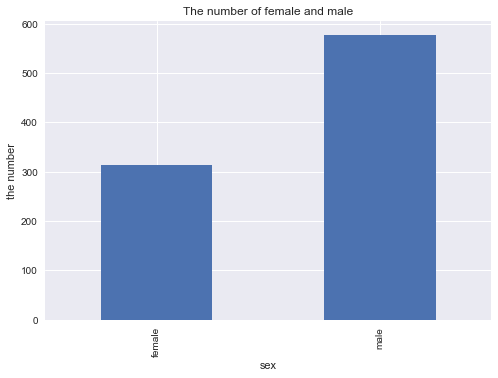

In [7]:
titanic_data.groupby('Sex')['Survived'].count().plot(kind='bar')
plt.title('The number of female and male')  #标题命名
plt.xlabel('sex')  #x轴命名
plt.ylabel('the number')  #y轴命名

男性、女性中死亡、存活的情况，可以通过绘制分类条形图展示：

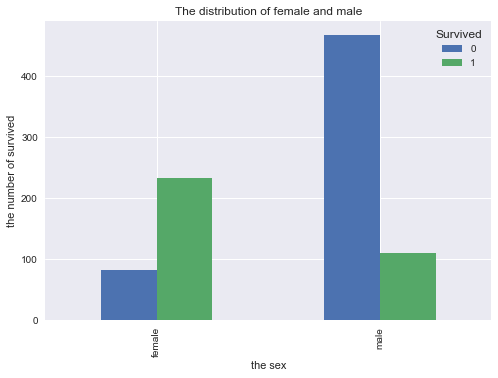

In [8]:
titanic_data.groupby(['Sex','Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.title('The distribution of female and male')
plt.xlabel('the sex')
plt.ylabel('the number of survived')

计算女性、男性的生存率：

In [9]:
titanic_data.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

女性的生存率为0.74高于男性0.19的生存率，因此性别与生存率有一定的关系。

## 3.2舱位和生存率的关系

同理，继续使用**groupby**统计不同组内的人数和生存率。

In [10]:
titanic_data.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

绘制成条形图：

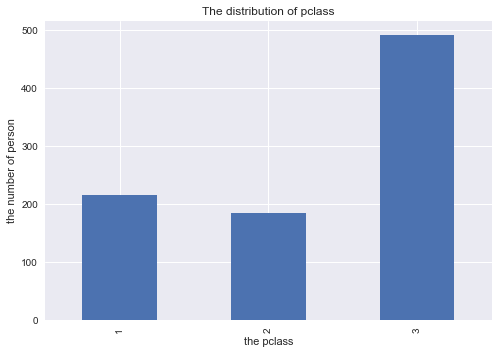

In [11]:
titanic_data.groupby('Pclass')['Survived'].count().plot(kind='bar')
plt.title('The distribution of pclass')
plt.xlabel('the pclass')
plt.ylabel('the number of person')

根据存活情况绘制分类条形图：

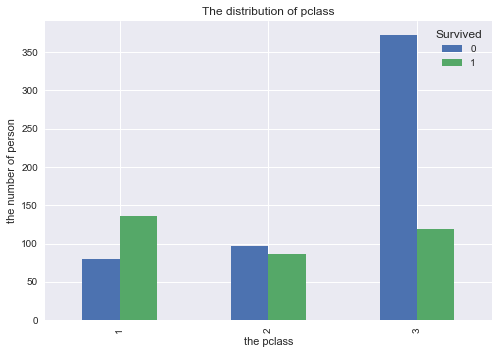

In [12]:
titanic_data.groupby(['Pclass','Survived'])['Survived'].count().unstack().plot(kind='bar')
plt.title('The distribution of pclass')
plt.xlabel('the pclass')
plt.ylabel('the number of person')

计算不同等级舱位的生存率：

In [13]:
titanic_data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

可以看出：一等舱的生存率明显高于其他级别的舱位，为进一步证实它们之间的相关性，需要计算舱位和生存的相关性：

利用**corrcoef**函数计算相关系数

In [14]:
pclass=titanic_data['Pclass']
survived=titanic_data['Survived']
np.corrcoef(survived,pclass)   

array([[ 1.        , -0.33848104],
       [-0.33848104,  1.        ]])

从上面数据呈现的是负相关的关系，也就是说舱位Pclass值越小Survived值越大，从而证实了一等舱的生存率更大。

## 3.3年龄和生存率的关系

在进行分析之前，需要对年龄中的缺失值进行处理，可以用**dropna**函数中subset参数设置，删除年龄列中的缺失值：

In [15]:
titanic_data=titanic_data.dropna(subset=['Age'])

In [16]:
titanic_data.info()   #确认缺失值是否删除

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    714 non-null int64
Survived       714 non-null int64
Pclass         714 non-null int64
Name           714 non-null object
Sex            714 non-null object
Age            714 non-null float64
SibSp          714 non-null int64
Parch          714 non-null int64
Ticket         714 non-null object
Fare           714 non-null float64
Cabin          185 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.5+ KB


发现Age中的缺失值已经成功删除

对于年龄，可以使用**cut**方法对数据进行分组来绘制每组中的人数和生存率：

In [17]:
max_age=titanic_data['Age'].max()  #最大年龄
min_age=titanic_data['Age'].min()  #最小年龄

In [18]:
print '最大年龄为：%s,最小年龄为：%s' %(max_age,min_age)

最大年龄为：80.0,最小年龄为：0.42


根据最大年龄和最小年龄划分组距：

In [19]:
bins=np.arange(0,90,10)

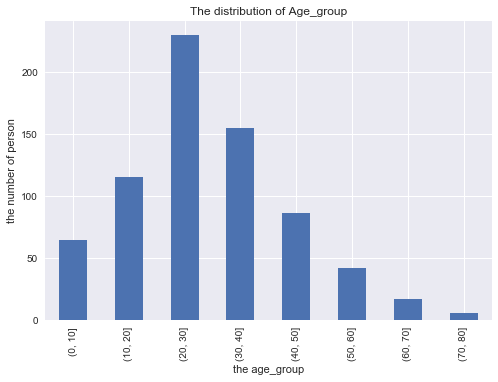

In [20]:
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins)
by_age=titanic_data.groupby(['Age_group'])['Survived']
by_age.count().plot(kind='bar')
plt.title('The distribution of Age_group')
plt.xlabel('the age_group')
plt.ylabel('the number of person')

从图中可以看出20—30岁的人最多，70-80岁的人最少。

根据年龄划分的不同阶段，绘制死亡、生存情况图：

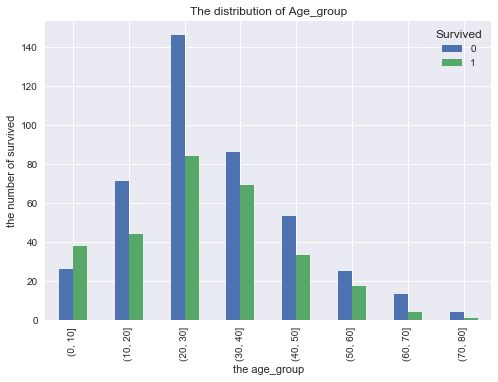

In [21]:
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins)
by_age=titanic_data.groupby(['Age_group','Survived'])['Survived']
by_age.count().unstack().plot(kind='bar')
plt.title('The distribution of Age_group')
plt.xlabel('the age_group')
plt.ylabel('the number of survived')

上图中，20-30年龄段的人死亡最多。

计算不同年龄段的生存率：

不同年龄段生存率：Age_group
(0, 10]     0.593750
(10, 20]    0.382609
(20, 30]    0.365217
(30, 40]    0.445161
(40, 50]    0.383721
(50, 60]    0.404762
(60, 70]    0.235294
(70, 80]    0.200000
Name: Survived, dtype: float64


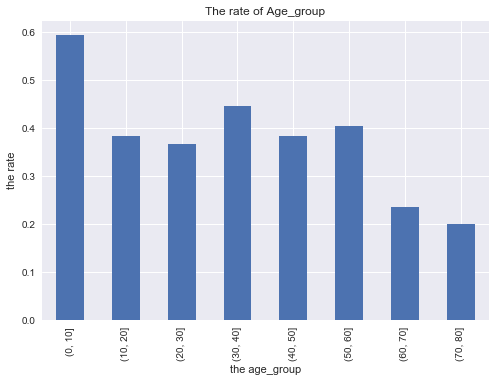

In [27]:
titanic_data['Age_group']=pd.cut(titanic_data['Age'],bins)
by_age=titanic_data.groupby(['Age_group'])['Survived']
by_age.mean().plot(kind='bar')
print '不同年龄段生存率：%s' % by_age.mean()   #输出生存率
plt.title('The rate of Age_group')
plt.xlabel('the age_group')
plt.ylabel('the rate')

图中，0—10岁的儿童生存率最高

# 4.结论

我们从性别、年龄、舱位三个方面进行了分析，发现性别、年龄、舱位和生存率有一定的关系，究其原因有以下两点：一是由于欧洲当时很高贵的绅士精神，不管什么事儿童、女性、老人优先，所以女性和儿童会被优先安排登上逃生船，从数据上反应出生存率高；二是不同舱位所处的物理位置不一样，如三等舱一般是內舱，位置靠内、靠下不利于逃生，然而一等舱位于靠上、靠外的位置，利于逃生，所以一等舱的人员生存率高。  
但是上述整个分析过程中，受到了几个因素的限制：一是计算不同因素的生存率时，基数各不相同，生存率会受到一定的影响；二是数据表中有缺失值，我们采取了直接删除缺失数据的方法，如Age列中缺失了177个数值，对最后的结果计算产生了一定的影响；三是泰坦尼克号上人员有2224人，我们获得的数据集只有891人，不到总数据的一半，容易得出‘以偏概全’的结论；四是除了数据集之外，是不是存在其他因素影响生存率，比如是否参加晚会、是否饮酒等。   
因此，我们暂且得到结论是：性别、年龄、舱位影响着船员的生存率。

# 5.总结反思

此次项目分析，最大的难点在于绘图函数的使用，网上收集了很多资料，也尝试了很多种类的函数，但都不理想。因此，对绘图函数的使用是今后学习的一个方向。